# COURSERA FINAL CAPSTONE

### In this notebook I will compare the different neigborhoods in New York to determine which one has the highest amount of hotels.
  
**The process will be as follows:**  
   
        1. A database of New York neigborhoods will be downloaded from a Json file 
        2. The raw data will be transformed into a pandas dataframe  
        3. A map of the New York neigborhoods will be displayed   
        4. A list of hotels will be made per borough using Foursquare API  
        5. Finally the neighborhoods will be compared in order to know which one has the highest amount of hotels  

## 1. Get the database from a Json file

In [10]:
# Import the libraries

import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


print ('Libraries imported')

Libraries imported


In [11]:
# Dowload the data from a Json file

!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

## 2. Transform the raw data into a readable dataframe

In [12]:
neighborhoods_data = newyork_data['features']


# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
NY = pd.DataFrame(columns=column_names)

# Fill the dataframe
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    NY = NY.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
print(NY.shape)
NY.head()

(306, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


## 3. Display a map of New York neighborhoods

In [13]:
# Import the libraries

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans


!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

import requests # library to handle requests

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

In [14]:
# Get the coordinates of New York City

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [15]:
# create map of New York using latitude and longitude values and display each neighborhood

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(NY['Latitude'], NY['Longitude'], NY['Borough'], NY['Neighborhood']):
    label = '{}, {}'.format(neighborhood,borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## 4. Make a list of the hotels in New York neighborhoods

### 4.1. List appart each borough and its neighborhoods

#### 4.1.1. The Bronx neighborhoods

In [16]:
bronx = NY[NY['Borough'] == 'Bronx'].reset_index(drop=True)
print(bronx.shape)
bronx.head()

(52, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


#### 4.1.2. Manhattan neighborhoods

In [17]:
manhattan = NY[NY['Borough'] == 'Manhattan'].reset_index(drop=True)
print(manhattan.shape)
manhattan.head()

(40, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


#### 4.1.3. Brooklyn neighborhoods

In [18]:
brooklyn = NY[NY['Borough'] == 'Brooklyn'].reset_index(drop=True)
print(brooklyn.shape)
brooklyn.head()

(70, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


#### 4.1.4. Queens neighborhoods

In [19]:
queens = NY[NY['Borough'] == 'Queens'].reset_index(drop=True)
print(queens.shape)
queens.head()

(81, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


#### 4.1.5. Staten Island neighborhoods

In [20]:
staten_island = NY[NY['Borough'] == 'Staten Island'].reset_index(drop=True)
print(staten_island.shape)
staten_island.head()

(63, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


### 4.2. Use Foursquare to extract the venues of each neighborhood

In [21]:
# Detail the personal parameters for Foursquare

CLIENT_ID = 'BJAKOBU2AS1ZQPMVLIE3JQRBOFQWPZONVEQLVS5RF4TXC4KG' # your Foursquare ID
CLIENT_SECRET = '2MUXVFOAOUIBESPYVU5S2N1SXXYKTZQDQQ431YLA1WICHO4K' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BJAKOBU2AS1ZQPMVLIE3JQRBOFQWPZONVEQLVS5RF4TXC4KG
CLIENT_SECRET:2MUXVFOAOUIBESPYVU5S2N1SXXYKTZQDQQ431YLA1WICHO4K


#### 4.2.1. Example of retrieving venues for one neighborhood

In [22]:
# Start extracting the venues of the first neighborhood in the Bronx (example)

neighborhood_latitude = bronx.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bronx.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = bronx.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


In [23]:
# Parameter Foursquare

LIMIT = 50 # limit of number of venues returned by Foursquare API



radius = 500 # define radius



# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=BJAKOBU2AS1ZQPMVLIE3JQRBOFQWPZONVEQLVS5RF4TXC4KG&client_secret=2MUXVFOAOUIBESPYVU5S2N1SXXYKTZQDQQ431YLA1WICHO4K&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&limit=50'

In [24]:
# Retrieve the venues of the first neigborhood in the Bronx

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ebe93fe9fcb92001b24d645'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': 40.899205181110005,
    'lng': -73.84125857127495},
   'sw': {'lat': 40.89020517211, 'lng': -73.8531424698231}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatLn

In [25]:
# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [26]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Lollipops Gelato,Dessert Shop,40.894123,-73.845892
1,Carvel Ice Cream,Ice Cream Shop,40.890487,-73.848568
2,Walgreens,Pharmacy,40.896528,-73.844700
3,Rite Aid,Pharmacy,40.896649,-73.844846
4,Dunkin',Donut Shop,40.890459,-73.849089


In [27]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

9 venues were returned by Foursquare.


#### 4.2.2. Identify the neighborhoods of each borough and extract the hotels for each neighborhood with Foursquare

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
             
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

##### 4.2.2.1. Extract the hotels in The Bronx

In [29]:
# Get the neighborhoods of The Bronx

bronx_venues = getNearbyVenues(names=bronx['Neighborhood'],
                                   latitudes=bronx['Latitude'],
                                   longitudes=bronx['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


In [30]:
print(bronx_venues.shape)
bronx_venues.head()

(1114, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [31]:
# Get the hotels dataframe for The Bronx

df_hotels_bronx=bronx_venues.loc[bronx_venues['Venue Category']=='Hotel']
df_hotels_bronx2=df_hotels_bronx.assign(Borough="Bronx") # Add the borough in a column to analyze in a future dataframe
print(df_hotels_bronx2.shape)
df_hotels_bronx2.head()

(1, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
969,Concourse Village,40.82478,-73.915847,Days Inn Bronx-Yankee Stadium,40.827092,-73.912007,Hotel,Bronx


In [32]:
# Dataframe of the number of hotels per neighborhood

df_bronx=df_hotels_bronx.groupby('Neighborhood').count()
df_bronx.drop(['Neighborhood Latitude', 'Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis=1, inplace=True)
df_bronx.rename(columns={"Venue": "Hotels"}, inplace= True)
df_bronx

,Hotels
Neighborhood,
Concourse Village,1


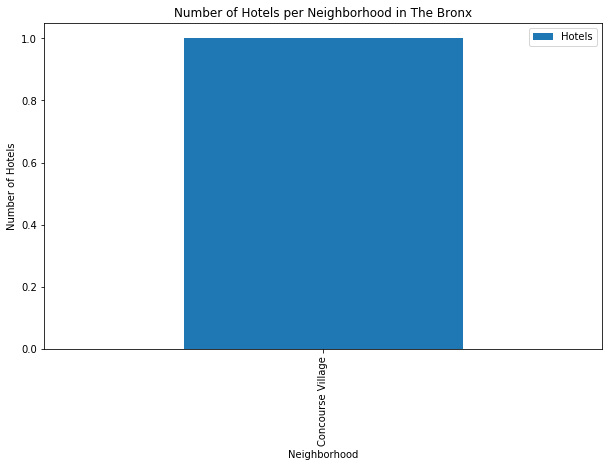

In [59]:
# Plot the hotels per neighborhood

df_bronx.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Hotels') # add y-label to the plot
plt.title('Number of Hotels per Neighborhood in The Bronx') # add title to the plot

plt.show()

#### 4.2.2.2. Extract the hotels in Manhattan

In [34]:
# Get the neighborhoods of Manhattan

manhattan_venues = getNearbyVenues(names=manhattan['Neighborhood'],
                                   latitudes=manhattan['Latitude'],
                                   longitudes=manhattan['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [35]:
print(manhattan_venues.shape)
manhattan_venues.head()

(1869, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [36]:
# Get the hotels dataframe of Manhattan

df_hotels_manhattan=manhattan_venues.loc[manhattan_venues['Venue Category']=='Hotel']
df_hotels_manhattan2=df_hotels_manhattan.assign(Borough="Manhattan")
print(df_hotels_manhattan2.shape)
df_hotels_manhattan2.head()

(40, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
28,Chinatown,40.715618,-73.994279,Hotel 50 Bowery NYC,40.715936,-73.996789,Hotel,Manhattan
74,Chinatown,40.715618,-73.994279,The Leon Hotel,40.715994,-73.995171,Hotel,Manhattan
362,Upper East Side,40.775639,-73.960508,The Carlyle,40.774413,-73.963301,Hotel,Manhattan
367,Upper East Side,40.775639,-73.960508,The Mark Hotel,40.775274,-73.963383,Hotel,Manhattan
390,Upper East Side,40.775639,-73.960508,The Surrey,40.774415,-73.963889,Hotel,Manhattan


In [37]:
# Dataframe of the number of hotels per neighborhood

df_manhattan=df_hotels_manhattan.groupby('Neighborhood').count()
df_manhattan.drop(['Neighborhood Latitude', 'Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis=1, inplace=True)
df_manhattan.rename(columns={"Venue": "Hotels"}, inplace= True)
df_manhattan

,Hotels
Neighborhood,
Battery Park City,3
Chelsea,2
Chinatown,2
Civic Center,1
Clinton,2
Financial District,2
Flatiron,1
Gramercy,2
Hudson Yards,4


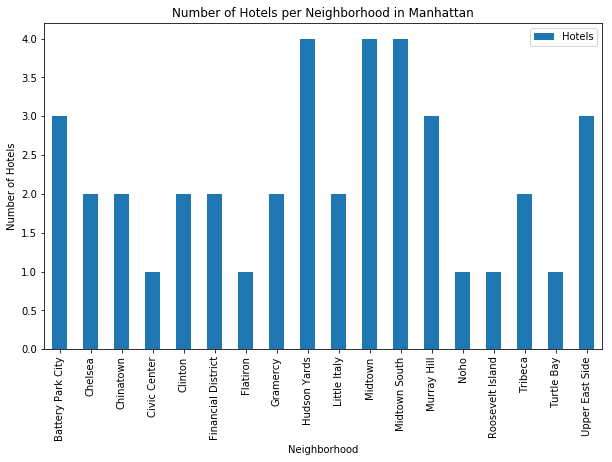

In [60]:
# Plot the hotels per neighborhood

df_manhattan.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Hotels') # add y-label to the plot
plt.title('Number of Hotels per Neighborhood in Manhattan') # add title to the plot

plt.show()

##### 4.2.2.3. Extract the hotels in Brooklyn

In [40]:
# Get the neighborhoods in Brooklyn

brooklyn_venues = getNearbyVenues(names=brooklyn['Neighborhood'],
                                   latitudes=brooklyn['Latitude'],
                                   longitudes=brooklyn['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [41]:
print(brooklyn_venues.shape)
brooklyn_venues.head()

(2151, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Leo's Casa Calamari,40.624200,-74.030931,Pizza Place
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,The Bookmark Shoppe,40.624577,-74.030562,Bookstore


In [42]:
# Get the hotels dataframe of Brooklyn

df_hotels_brooklyn=brooklyn_venues.loc[brooklyn_venues['Venue Category']=='Hotel']
df_hotels_brooklyn2=df_hotels_brooklyn.assign(Borough="Brooklyn")
print(df_hotels_brooklyn2.shape)
df_hotels_brooklyn2.head()

(3, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
258,Sheepshead Bay,40.586890,-73.943186,Best Western Plus Brooklyn Bay Hotel,40.584164,-73.938524,Hotel,Brooklyn
1110,Borough Park,40.633131,-73.990498,Park House Hotel,40.636598,-73.993681,Hotel,Brooklyn
1908,Fulton Ferry,40.703281,-73.995508,1 Hotel Brooklyn Bridge,40.702228,-73.995380,Hotel,Brooklyn


In [43]:
# Dataframe of the number of hotels per neighborhood

df_brooklyn=df_hotels_brooklyn.groupby('Neighborhood').count()
df_brooklyn.drop(['Neighborhood Latitude', 'Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis=1, inplace=True)
df_brooklyn.rename(columns={"Venue": "Hotels"}, inplace= True)
df_brooklyn

,Hotels
Neighborhood,
Borough Park,1
Fulton Ferry,1
Sheepshead Bay,1


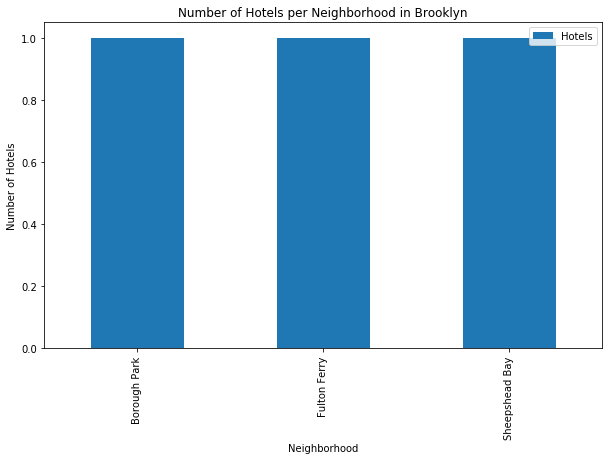

In [62]:
# Plot the hotels per neighborhood

df_brooklyn.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Hotels') # add y-label to the plot
plt.title('Number of Hotels per Neighborhood in Brooklyn') # add title to the plot

plt.show()

##### 4.2.2.4. Extract the hotels in Queens

In [45]:
# Get the neighborhoods in Queens

queens_venues = getNearbyVenues(names=queens['Neighborhood'],
                                   latitudes=queens['Latitude'],
                                   longitudes=queens['Longitude']
                                  )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


In [46]:
print(queens_venues.shape)
queens_venues.head()

(1864, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
4,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant


In [47]:
# Get the hotels dataframe of Queens

df_hotels_queens=queens_venues.loc[queens_venues['Venue Category']=='Hotel']
df_hotels_queens2=df_hotels_queens.assign(Borough="Queens")
print(df_hotels_queens2.shape)
df_hotels_queens2.head()

(18, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
357,Flushing,40.764454,-73.831773,Marco LaGuardia Hotel by Lexington,40.763567,-73.831048,Hotel,Queens
389,Long Island City,40.750217,-73.939202,Hilton Garden Inn,40.750216,-73.936886,Hotel,Queens
405,Long Island City,40.750217,-73.939202,Courtyard Long Island City/New York Manhattan ...,40.750080,-73.937226,Hotel,Queens
406,Long Island City,40.750217,-73.939202,Aloft Long Island City-Manhattan View,40.748279,-73.939824,Hotel,Queens
415,Long Island City,40.750217,-73.939202,Hyatt Place Long Island City / New York City,40.748154,-73.941484,Hotel,Queens


In [48]:
# Dataframe of the number of hotels per neighborhood

df_queens=df_hotels_queens.groupby('Neighborhood').count()
df_queens.drop(['Neighborhood Latitude', 'Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis=1, inplace=True)
df_queens.rename(columns={"Venue": "Hotels"}, inplace= True)
df_queens

,Hotels
Neighborhood,
Blissville,1
Edgemere,1
Flushing,1
Lindenwood,1
Long Island City,5
North Corona,2
Queens Village,1
Queensbridge,3
Rockaway Beach,1


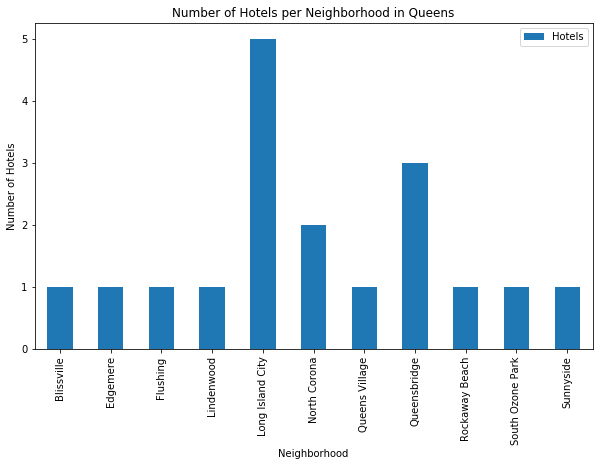

In [64]:
# Plot the hotels per neighborhood

df_queens.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Hotels') # add y-label to the plot
plt.title('Number of Hotels per Neighborhood in Queens') # add title to the plot

plt.show()

##### 4.2.2.5. Extract the hotels in Staten Island

In [50]:
# Get the neighborhoods in Staten Island

staten_island_venues = getNearbyVenues(names=staten_island['Neighborhood'],
                                   latitudes=staten_island['Latitude'],
                                   longitudes=staten_island['Longitude']
                                  )

St. George
New Brighton
Stapleton
Rosebank
West Brighton
Grymes Hill
Todt Hill
South Beach
Port Richmond
Mariner's Harbor
Port Ivory
Castleton Corners
New Springville
Travis
New Dorp
Oakwood
Great Kills
Eltingville
Annadale
Woodrow
Tottenville
Tompkinsville
Silver Lake
Sunnyside
Park Hill
Westerleigh
Graniteville
Arlington
Arrochar
Grasmere
Old Town
Dongan Hills
Midland Beach
Grant City
New Dorp Beach
Bay Terrace
Huguenot
Pleasant Plains
Butler Manor
Charleston
Rossville
Arden Heights
Greenridge
Heartland Village
Chelsea
Bloomfield
Bulls Head
Richmond Town
Shore Acres
Clifton
Concord
Emerson Hill
Randall Manor
Howland Hook
Elm Park
Manor Heights
Willowbrook
Sandy Ground
Egbertville
Prince's Bay
Lighthouse Hill
Richmond Valley
Fox Hills


In [51]:
print(staten_island_venues.shape)
staten_island_venues.head()

(836, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St. George,40.644982,-74.079353,A&S Pizzeria,40.643940,-74.077626,Pizza Place
1,St. George,40.644982,-74.079353,Beso,40.643306,-74.076508,Tapas Restaurant
2,St. George,40.644982,-74.079353,Staten Island September 11 Memorial,40.646767,-74.076510,Monument / Landmark
3,St. George,40.644982,-74.079353,Richmond County Bank Ballpark,40.645056,-74.076864,Baseball Stadium
4,St. George,40.644982,-74.079353,Shake Shack,40.643660,-74.075891,Burger Joint


In [52]:
# Get the hotels dataframe of Staten Island

df_hotels_SI=staten_island_venues.loc[staten_island_venues['Venue Category']=='Hotel']
df_hotels_SI2=df_hotels_SI.assign(Borough="Staten Island")
print(df_hotels_SI2.shape)
df_hotels_SI2

(5, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
220,Travis,40.586314,-74.190737,Fairfield Inn & Suites,40.586652,-74.191160,Hotel,Staten Island
223,Travis,40.586314,-74.190737,Staten Island New York Hotel,40.586781,-74.190973,Hotel,Staten Island
227,Travis,40.586314,-74.190737,Comfort Inn,40.586191,-74.190216,Hotel,Staten Island
400,Park Hill,40.609190,-74.080157,Staten Island Motor Lodge,40.608381,-74.076692,Hotel,Staten Island
427,Arrochar,40.596313,-74.067124,Staten Island Navy Lodge,40.598734,-74.062288,Hotel,Staten Island


In [53]:
# Dataframe of the number of hotels per neighborhood

df_SI=df_hotels_SI.groupby('Neighborhood').count()
df_SI.drop(['Neighborhood Latitude', 'Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis=1, inplace=True)
df_SI.rename(columns={"Venue": "Hotels"}, inplace= True)
df_SI

,Hotels
Neighborhood,
Arrochar,1
Park Hill,1
Travis,3


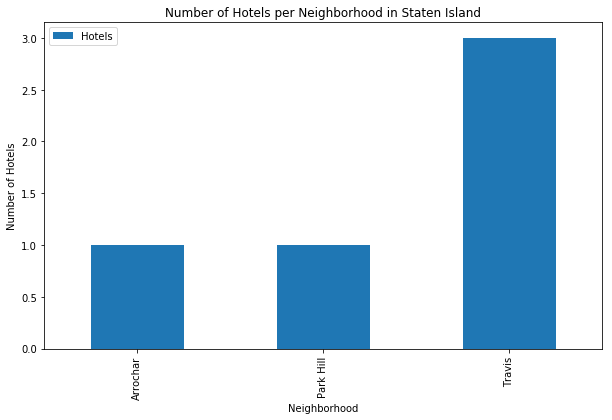

In [65]:
# Plot the hotels per neighborhood

df_SI.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Hotels') # add y-label to the plot
plt.title('Number of Hotels per Neighborhood in Staten Island') # add title to the plot

plt.show()

#### 4.2.3. Compilation of the former dataframes to create a unique Hotel Dataframe

In [55]:
hotels_NYC=pd.concat([df_hotels_bronx2, df_hotels_SI2, df_hotels_queens2, df_hotels_brooklyn2, df_hotels_manhattan2], axis=0,)
hotels_NYC.reset_index(drop=True, inplace=True)
print(hotels_NYC.shape)
hotels_NYC.head(10)

(67, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
0,Concourse Village,40.824780,-73.915847,Days Inn Bronx-Yankee Stadium,40.827092,-73.912007,Hotel,Bronx
1,Travis,40.586314,-74.190737,Fairfield Inn & Suites,40.586652,-74.191160,Hotel,Staten Island
2,Travis,40.586314,-74.190737,Staten Island New York Hotel,40.586781,-74.190973,Hotel,Staten Island
3,Travis,40.586314,-74.190737,Comfort Inn,40.586191,-74.190216,Hotel,Staten Island
4,Park Hill,40.609190,-74.080157,Staten Island Motor Lodge,40.608381,-74.076692,Hotel,Staten Island
5,Arrochar,40.596313,-74.067124,Staten Island Navy Lodge,40.598734,-74.062288,Hotel,Staten Island
6,Flushing,40.764454,-73.831773,Marco LaGuardia Hotel by Lexington,40.763567,-73.831048,Hotel,Queens
7,Long Island City,40.750217,-73.939202,Hilton Garden Inn,40.750216,-73.936886,Hotel,Queens
8,Long Island City,40.750217,-73.939202,Courtyard Long Island City/New York Manhattan ...,40.750080,-73.937226,Hotel,Queens
9,Long Island City,40.750217,-73.939202,Aloft Long Island City-Manhattan View,40.748279,-73.939824,Hotel,Queens


## 5. Comparison of the amount of hotels per Neighborhood

In [56]:
# Dataframe of the number of hotels per borough

df1=hotels_NYC.groupby('Borough').count()
df1.drop(['Neighborhood Latitude', 'Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category'], axis=1, inplace=True)
df1.rename(columns={"Neighborhood": "Hotels"}, inplace= True)
df1

,Hotels
Borough,
Bronx,1
Brooklyn,3
Manhattan,40
Queens,18
Staten Island,5


### 5.1. Bar Chart of the number of hotels per borough

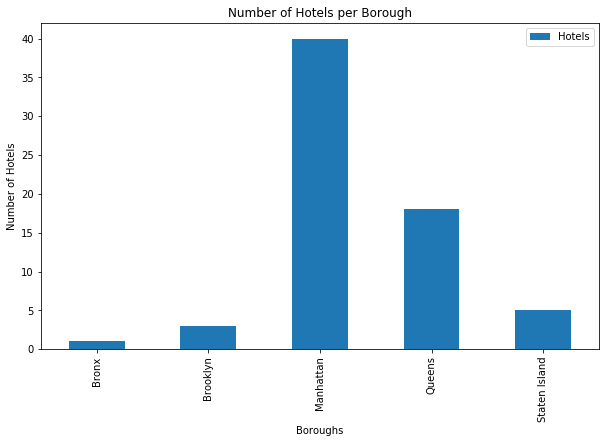

In [57]:
# Plot the hotels per borough

df1.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Boroughs') # add to x-label to the plot
plt.ylabel('Number of Hotels') # add y-label to the plot
plt.title('Number of Hotels per Borough') # add title to the plot

plt.show()

### 5.2. Map of the hotels in New York City

In [58]:
map_hotels = folium.Map([40.7127281, -74.0060152], zoom_start=11)
hotels_NYC.apply(lambda row:folium.CircleMarker(location=[row["Neighborhood Latitude"], row["Neighborhood Longitude"]], 
                                              radius=3, popup=row['Venue'])
                                             .add_to(map_hotels), axis=1)

map_hotels